In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de datos

In [2]:
#Dataset with data since 1996
df_train = pd.read_csv('../DataStats.NBA/PreAllStar/TrainAS.csv')

#Dataset with 2020 data
df_2020 = pd.read_csv('../DataStats.NBA/PreAllStar/Test.csv')

In [3]:
df_train

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?,All-Star
0,1996,90.1,Michael Jordan,CHI,1,40,40,35,30.9,5.8,...,0.5,1.7,56.4,1.2,0.004,33.6,19.8,10,1,1
1,1996,90.1,Shaquille O'Neal,LAL,3,40,41,28,26.2,13.2,...,3.1,3.1,55.7,0.0,0.003,30.4,18.4,4,1,1
2,1996,90.1,Latrell Sprewell,GSW,7,39,39,16,25.9,4.9,...,0.8,4.0,57.1,2.2,0.001,28.2,14.5,2,0,1
3,1996,90.1,Karl Malone,UTA,4,40,40,27,25.8,10.8,...,0.7,3.1,57.6,0.0,0.003,31.5,20.8,9,1,1
4,1996,90.1,Hakeem Olajuwon,HOU,1,37,41,28,24.1,9.4,...,2.2,3.7,54.8,0.1,0.003,32.2,16.3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,2019,100.3,Miye Oni,UTA,3,3,43,2,0.0,0.3,...,0.0,0.3,0.0,0.0,0.000,4.5,0.0,0,0,0
10077,2019,100.3,Paul Watson,TOR,3,2,43,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.003,14.3,-4.7,0,0,0
10078,2019,100.3,Stanton Kidd,UTA,3,4,43,3,0.0,0.8,...,0.0,0.5,0.0,0.0,0.001,13.9,-7.7,0,0,0
10079,2019,100.3,Talen Horton-Tucker,LAL,1,2,43,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,10.0,14.8,0,0,0


In [4]:
df_2020

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,STL,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?
0,2020,99.2,Bogdan Bogdanovic,ATL,11,11,36,6,9.4,3.5,...,0.4,0.2,1.2,53.7,2.1,0.089,17.7,8.2,0,0
1,2020,99.2,Brandon Goodwin,ATL,11,24,36,10,4.3,1.1,...,0.4,0.0,0.5,43.8,0.6,0.055,18.7,6.3,0,0
2,2020,99.2,Bruno Fernando,ATL,11,18,36,10,1.7,3.3,...,0.1,0.1,0.8,49.1,0.0,0.037,12.5,7.6,0,0
3,2020,99.2,Cam Reddish,ATL,11,26,36,10,11.2,4.0,...,1.3,0.3,1.3,48.8,1.3,0.046,18.3,5.3,0,0
4,2020,99.2,Clint Capela,ATL,11,32,36,13,14.7,14.2,...,0.8,2.2,1.4,59.3,0.0,0.120,19.3,16.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2020,99.2,Robin Lopez,WAS,12,34,34,14,8.3,4.3,...,0.3,0.6,1.1,62.9,0.1,0.067,15.2,8.6,0,0
488,2020,99.2,Rui Hachimura,WAS,12,27,34,14,12.5,5.4,...,0.7,0.1,1.0,54.6,0.8,0.045,17.1,7.9,0,0
489,2020,99.2,Russell Westbrook,WAS,12,27,34,10,20.3,9.7,...,1.1,0.3,4.8,48.4,1.1,0.086,30.1,13.7,9,1
490,2020,99.2,Thomas Bryant,WAS,12,10,34,2,14.3,6.1,...,0.4,0.8,1.1,70.4,0.9,0.038,16.3,11.1,0,0


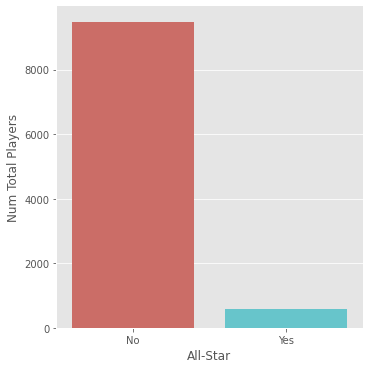

In [5]:
palette = sns.color_palette("hls", 2)
plt.style.use("ggplot")
g = sns.catplot(x='All-Star', data=df_train, kind="count", palette=palette)

g.set(ylabel="Num Total Players")
g.set_xticklabels(["No", "Yes"])

# Preprocesamiento de los datos

## ELIMINAR OUTLIERS

In [6]:
#Debemos eliminar jugadores que fueron All-Star pero que no debieron ser seleccionados. Jugadores que fueron seleccionados a pesar de su mal rendimiento o habiendo jugado muy pocos partidos debido a lesiones, a que eran/habian sido grandes estrellas de la liga o gracias al voto de los fans(quienes deciden el quinteto titular).
#Video Drafteados -> https://www.youtube.com/watch?v=9h03NAdPi6w

#Son pocos los jugadores que debemos de eliminar,por lo que podemos hacerlo a mano.

# 14.4 PTS + 4.4 AST en 19GP preAll-Star. Juega 3 más y deja la NBA.
df_train.drop( df_train[ (df_train['PLAYER']  == 'Allen Iverson') & (df_train['Year'] == 2009) ].index, inplace=True )
# Elección controvertida en su penultimo All-Star también.
df_train.drop( df_train[ (df_train['PLAYER']  == 'Allen Iverson') & (df_train['Year'] == 2008) ].index, inplace=True )
# Votado por publico. 13.8PTS + 6.3REB + 6.3AST en 4GP preAll-Star. 
df_train.drop( df_train[ (df_train['PLAYER']  == 'Grant Hill') & (df_train['Year'] == 2000) ].index, inplace=True )
# Votado por la comunidad china. 10.2PTS + 5.4REB en 5GP preAll-Star. No juega más en la NBA\n",
df_train.drop( df_train[ (df_train['PLAYER']  == 'Yao Ming') & (df_train['Year'] == 2010) ].index, inplace=True )
#Lastrado por las lesiones en ambas temporadas.
df_train.drop( df_train[ (df_train['PLAYER']  == 'Anfernee Hardaway') & (df_train['Year'] == 1996) ].index, inplace=True )
#16.4 PTS + 3.6 AST en 17GP preAll-Star.
df_train.drop( df_train[ (df_train['PLAYER']  == 'Anfernee Hardaway') & (df_train['Year'] == 1997) ].index, inplace=True )
#Votado titular. 13.8PTS + 6.3AST en 6GP preAll-Star
df_train.drop( df_train[ (df_train['PLAYER']  == 'Kobe Bryant') & (df_train['Year'] == 2013) ].index, inplace=True )
# Entro como suplente a modo de homenaje.
df_train.drop( df_train[ (df_train['PLAYER']  == 'Dirk Nowitzki') & (df_train['Year'] == 2018) ].index, inplace=True )
df_train

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?,All-Star
0,1996,90.1,Michael Jordan,CHI,1,40,40,35,30.9,5.8,...,0.5,1.7,56.4,1.2,0.004,33.6,19.8,10,1,1
1,1996,90.1,Shaquille O'Neal,LAL,3,40,41,28,26.2,13.2,...,3.1,3.1,55.7,0.0,0.003,30.4,18.4,4,1,1
2,1996,90.1,Latrell Sprewell,GSW,7,39,39,16,25.9,4.9,...,0.8,4.0,57.1,2.2,0.001,28.2,14.5,2,0,1
3,1996,90.1,Karl Malone,UTA,4,40,40,27,25.8,10.8,...,0.7,3.1,57.6,0.0,0.003,31.5,20.8,9,1,1
4,1996,90.1,Hakeem Olajuwon,HOU,1,37,41,28,24.1,9.4,...,2.2,3.7,54.8,0.1,0.003,32.2,16.3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,2019,100.3,Miye Oni,UTA,3,3,43,2,0.0,0.3,...,0.0,0.3,0.0,0.0,0.000,4.5,0.0,0,0,0
10077,2019,100.3,Paul Watson,TOR,3,2,43,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.003,14.3,-4.7,0,0,0
10078,2019,100.3,Stanton Kidd,UTA,3,4,43,3,0.0,0.8,...,0.0,0.5,0.0,0.0,0.001,13.9,-7.7,0,0,0
10079,2019,100.3,Talen Horton-Tucker,LAL,1,2,43,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,10.0,14.8,0,0,0


## TRANSFORMACIÓN DE LOS DATOS

In [7]:
#TRANSFORM DATA
for df in [df_train, df_2020]:
    #Percentage of GP out of Team GP
    df['GP%'] = (df['GP'] / df['Team GP'])  
    df['W%'] = (df['W'] / df['Team GP'])  

    #Delete players with less tha 33% of games played.
    df.drop(df[df['GP%'] < 0.33].index, inplace=True)

    #Transform the data in function of the Avg. Pace
    for stat in ['PTS','REB','AST','STL','BLK', 'TOV', '3PM']: 
        df['Transformed ' + stat] = df[stat] / df['Avg. Pace']

## GRAFICAS DE RELACIÓN ENTRE LAS VARIABLES

<AxesSubplot:xlabel='Team Conference Rank', ylabel='count'>

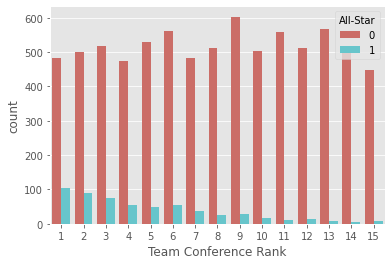

In [8]:
# fig_dims = (12, 8)
# fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Team Conference Rank', hue='All-Star', data=df_train, palette=palette)

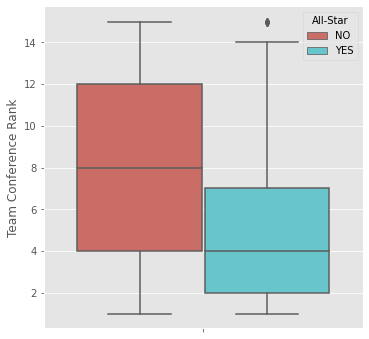

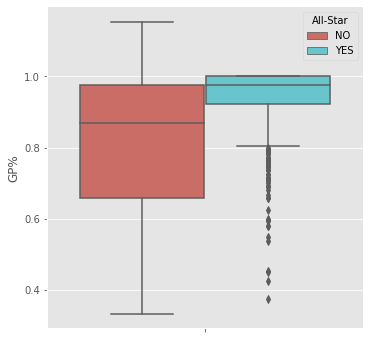

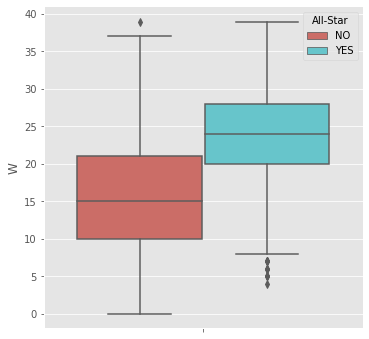

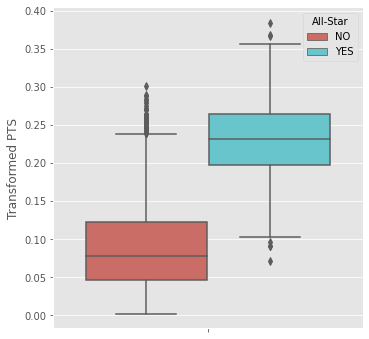

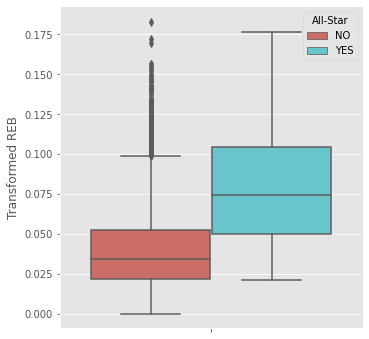

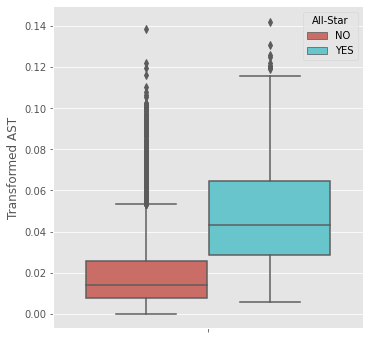

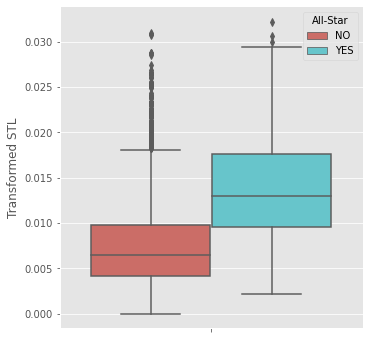

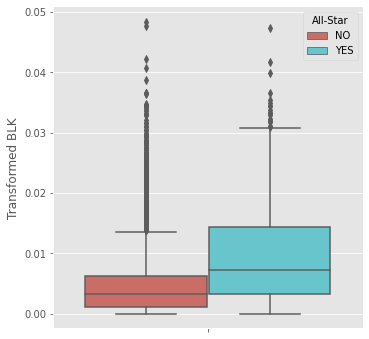

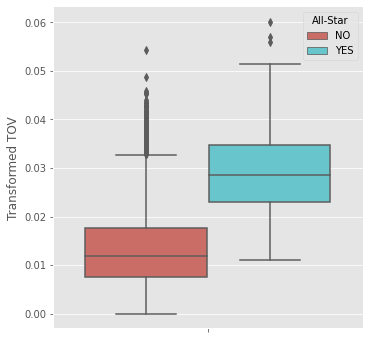

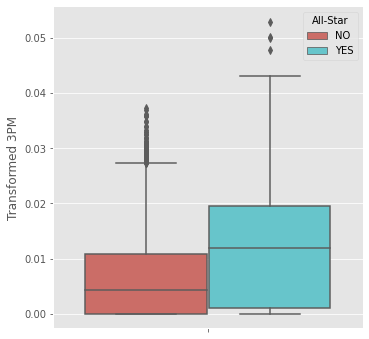

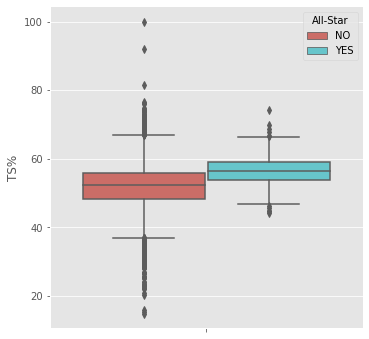

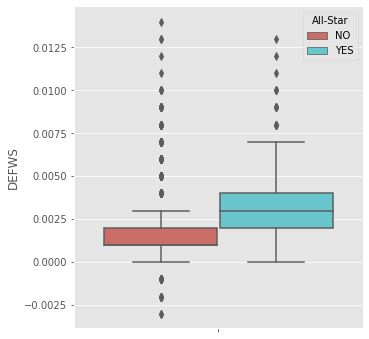

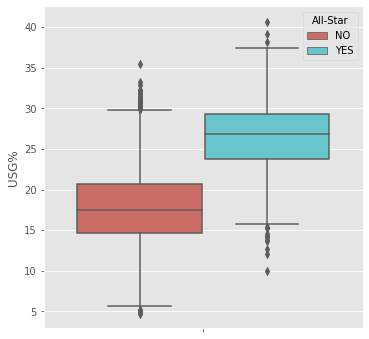

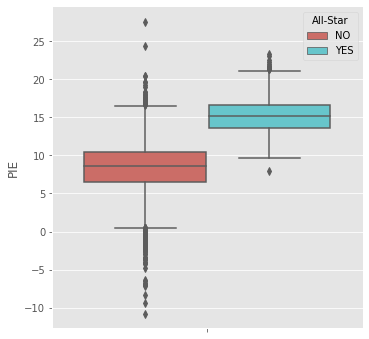

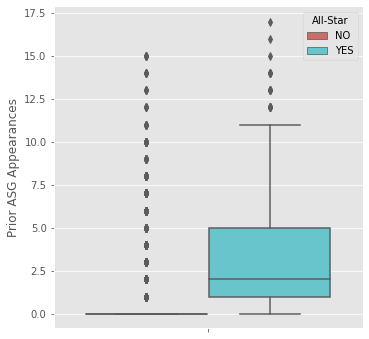

In [9]:
plt.style.use("ggplot")
# # fig = plt.figure(figsize=(20,16))
variables = ['Team Conference Rank','GP%','W','Transformed PTS','Transformed REB','Transformed AST','Transformed STL','Transformed BLK', 'Transformed TOV', 'Transformed 3PM', 'TS%','DEFWS','USG%','PIE','Prior ASG Appearances']
df_train['Grafica'] = 0
for var in variables:
    # g = sns.catplot(data=df_train, y=var, x='Grafica', hue='All-Star', kind="violin", split=True, palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    # legend = g._legend
    # for g, l in zip(legend.texts,("NO", "YES")):
    #     g.set_text(l)

    g = sns.catplot(data=df_train, y=var, x='Grafica' , hue='All-Star', kind="box", palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    legend = g._legend
    for t, l in zip(legend.texts,("NO", "YES")):
        t.set_text(l)

    # g = sns.catplot(data=df_train, y=var, x='Grafica' , hue='All-Star', kind="boxen", palette=palette, legend_out=False).set(xticklabels=[]).set(xlabel=None)
    # legend = g._legend
    # for t, l in zip(legend.texts,("NO", "YES")):
    #     t.set_text(l)

In [10]:
#Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,AST,STL,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?,All-Star
variables_selec = ['Team Conference Rank','GP%','W%','Transformed PTS','Transformed REB','Transformed AST','Transformed STL','Transformed BLK', 'Transformed TOV', 'TS%', 'DEFWS','USG%','PIE','Prior ASG Appearances']
df_trainTransformed = df_train[variables_selec + ['All-Star']]
df_2020Transformed = df_2020[variables_selec]
df_2020.head()

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,AS Last Year?,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,Transformed 3PM
1,2020,99.2,Brandon Goodwin,ATL,11,24,36,10,4.3,1.1,...,0,0.666667,0.277778,0.043347,0.011089,0.018145,0.004032,0.000000,0.005040,0.006048
2,2020,99.2,Bruno Fernando,ATL,11,18,36,10,1.7,3.3,...,0,0.500000,0.277778,0.017137,0.033266,0.005040,0.001008,0.001008,0.008065,0.000000
3,2020,99.2,Cam Reddish,ATL,11,26,36,10,11.2,4.0,...,0,0.722222,0.277778,0.112903,0.040323,0.013105,0.013105,0.003024,0.013105,0.013105
4,2020,99.2,Clint Capela,ATL,11,32,36,13,14.7,14.2,...,0,0.888889,0.361111,0.148185,0.143145,0.009073,0.008065,0.022177,0.014113,0.000000
5,2020,99.2,Danilo Gallinari,ATL,11,24,36,10,11.7,3.4,...,0,0.666667,0.277778,0.117944,0.034274,0.015121,0.005040,0.001008,0.011089,0.020161


In [11]:
df_trainTransformed.sample(5)

,Team Conference Rank,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,TS%,DEFWS,USG%,PIE,Prior ASG Appearances,All-Star
5413,1,0.809524,0.619048,0.033441,0.017260,0.006472,0.002157,0.001079,0.005394,41.9,0.001,18.7,3.8,0,0
500,13,0.923077,0.512821,0.142857,0.029900,0.058693,0.014396,0.000000,0.025471,48.3,0.003,21.7,10.1,1,0
5631,4,1.000000,0.651163,0.119435,0.060803,0.009772,0.003257,0.004343,0.013029,56.3,0.003,20.4,12.3,0,0
6985,13,1.000000,0.380952,0.092652,0.077742,0.008520,0.003195,0.008520,0.010650,57.8,0.001,18.5,12.8,0,0
3726,4,0.578947,0.394737,0.017680,0.016575,0.001105,0.003315,0.001105,0.002210,47.0,0.001,12.7,2.9,0,0


In [12]:
df_trainTransformed.describe()

,Team Conference Rank,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,TS%,DEFWS,USG%,PIE,Prior ASG Appearances,All-Star
count,8357.00000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000
mean,7.81680,0.811355,0.405551,0.098702,0.042864,0.021677,0.007765,0.005094,0.014410,52.124566,0.001767,18.359208,8.932919,0.530095,0.070001
std,4.27972,0.197606,0.179354,0.064316,0.027501,0.020093,0.004939,0.005612,0.008849,6.540068,0.001261,4.957701,3.655561,1.770783,0.255164
min,1.00000,0.333333,0.000000,0.002130,0.000000,0.000000,0.000000,0.000000,0.000000,14.800000,-0.003000,4.700000,-10.800000,0.000000,0.000000
25%,4.00000,0.675000,0.268293,0.048835,0.022851,0.007692,0.004296,0.001105,0.007667,48.600000,0.001000,14.900000,6.700000,0.000000,0.000000
50%,8.00000,0.880952,0.395349,0.083605,0.036209,0.015201,0.006615,0.003264,0.012333,52.500000,0.002000,17.900000,8.900000,0.000000,0.000000
75%,11.00000,0.976744,0.536585,0.135816,0.056277,0.028913,0.010373,0.006522,0.019544,56.100000,0.002000,21.600000,11.100000,0.000000,0.000000
max,15.00000,1.153846,0.906977,0.384530,0.183130,0.142237,0.032223,0.048405,0.060166,100.000000,0.014000,40.700000,27.600000,17.000000,1.000000


In [13]:
df_2020Transformed.sample(5)

,Team Conference Rank,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,TS%,DEFWS,USG%,PIE,Prior ASG Appearances
354,14,0.666667,0.194444,0.073589,0.039315,0.013105,0.008065,0.003024,0.009073,62.8,0.074,13.2,7.5,0
149,15,0.944444,0.250000,0.099798,0.039315,0.011089,0.006048,0.000000,0.007056,58.2,0.061,17.2,9.0,0
457,1,1.000000,0.750000,0.158266,0.039315,0.019153,0.005040,0.001008,0.014113,58.7,0.113,20.6,8.9,0
337,11,0.694444,0.222222,0.064516,0.023185,0.015121,0.004032,0.000000,0.010081,51.0,0.074,18.6,7.5,0
455,8,0.833333,0.388889,0.071573,0.019153,0.011089,0.005040,0.002016,0.008065,54.9,0.053,20.5,7.7,0


In [14]:
df_2020Transformed.describe()

,Team Conference Rank,GP%,W%,Transformed PTS,Transformed REB,Transformed AST,Transformed STL,Transformed BLK,Transformed TOV,TS%,DEFWS,USG%,PIE,Prior ASG Appearances
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,8.258883,0.763940,0.383757,0.103575,0.041172,0.022850,0.007077,0.004536,0.012424,56.234264,0.067020,18.203553,9.259898,0.474619
std,4.408987,0.198774,0.153497,0.067794,0.025004,0.019834,0.003937,0.004373,0.008649,6.871549,0.034162,5.546705,3.435700,1.676242
min,1.000000,0.333333,0.027778,0.008065,0.003024,0.000000,0.000000,0.000000,0.001008,25.100000,-0.017000,7.900000,-3.400000,0.000000
25%,4.000000,0.611111,0.272147,0.052419,0.023185,0.009073,0.004032,0.002016,0.006048,52.325000,0.042000,14.100000,7.100000,0.000000
50%,9.000000,0.811655,0.388889,0.085685,0.036290,0.016129,0.007056,0.003024,0.010081,56.900000,0.063000,17.350000,9.000000,0.000000
75%,12.000000,0.944444,0.486293,0.138105,0.053427,0.030242,0.009073,0.006048,0.016129,60.900000,0.090000,21.775000,11.100000,0.000000
max,15.000000,1.000000,0.750000,0.331653,0.143145,0.111895,0.020161,0.034274,0.048387,73.700000,0.177000,34.900000,20.900000,16.000000


# Creación del modelo

In [15]:
X = df_trainTransformed.loc[:,'Team Conference Rank':'Prior ASG Appearances']
Y = df_trainTransformed.loc[:,'All-Star']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## LAZYPREDICT

In [16]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(predictions=True)
# models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

In [17]:
# models

In [18]:
# sns.barplot(x=models.index, y=models.Accuracy)
# plt.xticks(
#     rotation=45, horizontalalignment="right",)
# plt.title("LAZY PREDICT")
# plt.xlabel("MODELO")
# plt.ylabel("ACCURACY")
# plt.show()

In [19]:
# from pytorch_tabnet.tab_model import TabNetClassifier

# classifier = TabNetClassifier()  #TabNetRegressor()

# # classifier.fit(X_train=X_train, y_train=Y_train)

# # predictions = classifier.predict_proba(X_test)[:,1]

## SKLEARN PIPELINE

In [20]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
minMaxScaler = MinMaxScaler()
normalizer = Normalizer()

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

randomForestClassifier = RandomForestClassifier()
adaBoostClassifier = AdaBoostClassifier()
baggingClassifier = BaggingClassifier() 
extraTreesClassifier = ExtraTreesClassifier()
gradientBoostingClassifier = GradientBoostingClassifier()

In [22]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA()
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# qda = QDA()

# from sklearn.naive_bayes import MultinomialNB
# mNB = MultinomialNB()
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier()
# from sklearn.calibration import CalibratedClassifierCV
# calibratedClassifierCV = CalibratedClassifierCV()

# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier()

# [             { 'modelo':[lda],
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__solver':['svd', 'lsqr', 'eigen'],
                # 'modelo__shrinkage':['auto', np.arange(0,1,0.1)] },
                
                # {'modelo':[qda],                 
                # 'scaler':[minMaxScaler, normalizer],},
                
                # {'modelo':[randomForestClassifier],                 
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__criterion':['gini', 'entropy'],
                # 'modelo__bootstrap':[True, False],
                # 'modelo__warm_start':[True, False]
                # },      

                # {'modelo':[adaBoostClassifier],                 
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__algorithm':['SAMME', 'SAMME.R']},

                # {'modelo':[baggingClassifier],                 
                # 'scaler':[minMaxScaler, normalizer], 
                # 'modelo__bootstrap':[True, False],
                # 'modelo__warm_start':[True, False]},

                # {'modelo':[extraTreesClassifier],                 
                # 'scaler':[minMaxScaler, normalizer], 
                # 'modelo__criterion':['gini', 'entropy']},

                # {'modelo':[gradientBoostingClassifier],                 
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__loss':['deviance', 'exponential'],
                # 'modelo__criterion':['friedman_mse', 'mse', 'mae']},
                
                # {'modelo':[KNN],                 
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__n_neighbors':['auto', np.arange(3, 15, 1)],
                # 'modelo__weights':['uniform', 'distance'],
                # 'modelo__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']},

                # {'modelo':[calibratedClassifierCV],                 
                # 'scaler':[minMaxScaler, normalizer],
                # 'modelo__method':['sigmoid', 'isotonic'],},
                  
                # {'modelo':[mlp],
                # 'modelo__hidden_layer_sizes':[range(2,20)], 
                # 'modelo__activation':['identity', 'logistic', 'tanh', 'relu'],    
                # 'modelo__solver':['lbfgs', 'sgd', 'adam'],
                # 'scaler':[minMaxScaler, normalizer]}, 
                
#                 ]

In [23]:
from sklearn.pipeline import Pipeline
steps = [('scaler', minMaxScaler), ('modelo', randomForestClassifier)]
mypipeline = Pipeline(steps=steps)
from sklearn.model_selection import GridSearchCV
param_grid = [                 

                {'modelo':[randomForestClassifier],                 
                'scaler':[minMaxScaler, normalizer],
                'modelo__criterion':['gini', 'entropy'],
                'modelo__bootstrap':[True, False],
                'modelo__warm_start':[True, False]
                },      

                {'modelo':[extraTreesClassifier],                 
                'scaler':[minMaxScaler, normalizer], 
                'modelo__criterion':['gini', 'entropy']},

                {'modelo':[gradientBoostingClassifier],                 
                'scaler':[minMaxScaler, normalizer],
                'modelo__loss':['deviance', 'exponential'],
                'modelo__criterion':['friedman_mse', 'mse', 'mae']},

                ]
                
gs = GridSearchCV(mypipeline, param_grid=param_grid, n_jobs=-1, refit=True, cv=10)
gs.fit(X_train,Y_train)
Y_test_pred = gs.predict(X_test)
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
confusion_matrix(Y_test, Y_test_pred)

array([[2534,   40],
       [  50,  134]], dtype=int64)

In [24]:
miMejorModeloParams = gs.best_params_
miMejorModeloParams

{'modelo': GradientBoostingClassifier(criterion='mse', loss='exponential'),
 'modelo__criterion': 'mse',
 'modelo__loss': 'exponential',
 'scaler': MinMaxScaler()}

In [25]:
miMejorModelo = gs.best_estimator_
miMejorModelo

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('modelo',
                 GradientBoostingClassifier(criterion='mse',
                                            loss='exponential'))])

In [26]:
# miMejorModelo.named_steps['modelo'].n_estimators
miMejorModeloScore = gs.best_score_
miMejorModeloScore

0.9757101328903653

## MÉTRICAS

In [27]:
metricas = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
puntuacion = [accuracy_score(Y_test, Y_test_pred), precision_score(Y_test, Y_test_pred), 
                f1_score(Y_test, Y_test_pred), recall_score(Y_test, Y_test_pred)]
list_of_tuples = list(zip(metricas, puntuacion))
df_clasificadores = pd.DataFrame(list_of_tuples, columns = ['Métrica', 'Puntuación'])
df_clasificadores.set_index('Métrica')

,Puntuación
Métrica,
Accuracy,0.967368
Precision,0.770115
F1 Score,0.748603
Recall,0.728261


In [28]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": miMejorModelo.steps[1][1].feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
3,Transformed PTS,0.565972
12,PIE,0.184775
2,W%,0.116794
13,Prior ASG Appearances,0.034696
0,Team Conference Rank,0.017979
4,Transformed REB,0.016569
9,TS%,0.013294
5,Transformed AST,0.012620
7,Transformed BLK,0.012171
8,Transformed TOV,0.007732


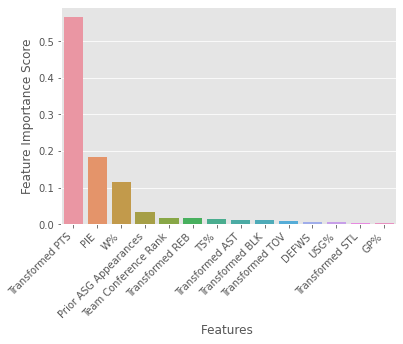

In [29]:
# visualizar características importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquetas

plt.xlabel("Features ")
plt.ylabel("Feature Importance Score")
plt.xticks(
    rotation=45, horizontalalignment="right"
)
plt.show()

## PREDICCIÓN

In [30]:
predict = miMejorModelo.predict(df_2020Transformed)
predict_proba = miMejorModelo.predict_proba(df_2020Transformed)

In [31]:
df_info = df_2020[['PLAYER', 'TEAM']]
df_info.reset_index(drop=True, inplace=True)
df_info['PROBABILITY'] = predict_proba[:, 1]

<ipython-input-31-2ef91cb9dba0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['PROBABILITY'] = predict_proba[:, 1]


In [32]:
stars_selected = df_info.get(predict==1)

In [33]:
east_conf = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']
west_conf = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']
stars_selected_east = stars_selected[stars_selected.TEAM.isin(east_conf)].sort_values('PROBABILITY', ascending=False).reset_index(drop=True)
stars_selected_east.index+=1 #Para empezar en 1 los indices
# .set_index('PLAYER')
stars_selected_west = stars_selected[stars_selected.TEAM.isin(west_conf)].sort_values('PROBABILITY', ascending=False).reset_index(drop=True)
stars_selected_west.index+=1 #Para empezar en 1 los indices

# ALL-STARS ESTE

In [34]:
stars_selected_east

,PLAYER,TEAM,PROBABILITY
1,Joel Embiid,PHI,0.999563
2,Giannis Antetokounmpo,MIL,0.999286
3,James Harden,BKN,0.998128
4,Kyrie Irving,BKN,0.988134
5,Trae Young,ATL,0.985877
6,Kevin Durant,BKN,0.976827
7,Bradley Beal,WAS,0.973037
8,Zach LaVine,CHI,0.943744
9,Jayson Tatum,BOS,0.878566
10,Julius Randle,NYK,0.866038


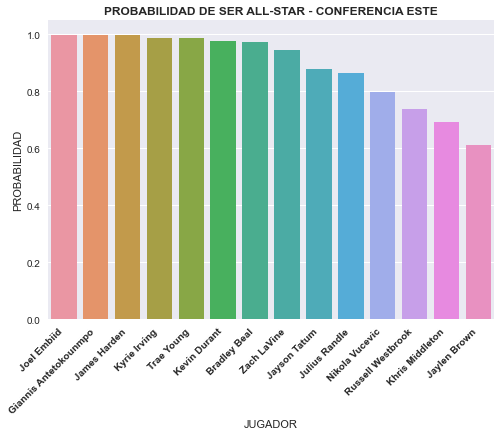

In [35]:
palette = sns.color_palette("hls")
plt.style.use("seaborn")
sns.barplot(x=stars_selected_east.PLAYER, y=stars_selected_east.PROBABILITY)
plt.xticks(
    rotation=45, horizontalalignment="right",fontweight='bold')
plt.title("PROBABILIDAD DE SER ALL-STAR - CONFERENCIA ESTE",fontweight='bold')
plt.xlabel("JUGADOR")
plt.ylabel("PROBABILIDAD")
plt.show()

# ALL-STARS OESTE

In [36]:
stars_selected_west

,PLAYER,TEAM,PROBABILITY
1,LeBron James,LAL,0.996623
2,Damian Lillard,POR,0.994267
3,Kawhi Leonard,LAC,0.992619
4,Donovan Mitchell,UTA,0.988517
5,Anthony Davis,LAL,0.986865
6,Luka Doncic,DAL,0.986222
7,Stephen Curry,GSW,0.983079
8,Nikola Jokic,DEN,0.981279
9,Devin Booker,PHX,0.965926
10,Paul George,LAC,0.916055


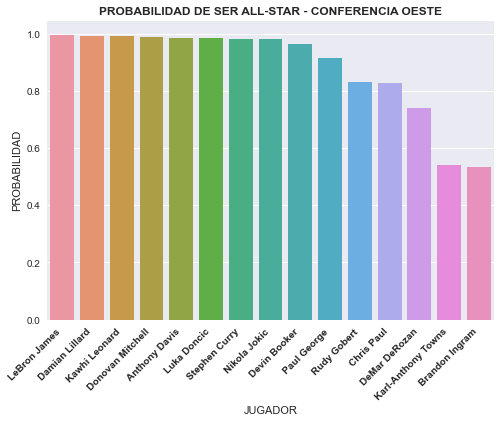

In [37]:
sns.barplot(x=stars_selected_west.PLAYER, y=stars_selected_west.PROBABILITY)
plt.xticks(
    rotation=45, horizontalalignment="right",fontweight='bold')
plt.title("PROBABILIDAD DE SER ALL-STAR - CONFERENCIA OESTE", fontweight='bold')
plt.xlabel("JUGADOR")
plt.ylabel("PROBABILIDAD")
plt.show()